In [1]:
import numpy as np
from os import path
from operator import itemgetter
import matplotlib.pyplot as plt
from random import randint
from random import gauss
from random import choice

In [2]:
# Globals
DIST_THRESH = 0.01

In [3]:
def load_poi_data():
    cwd = path.dirname("__file__")
    dat = np.loadtxt(path.join(cwd, 'pois.csv'), delimiter=" ", dtype=object, skiprows=1)
    poi_ids = dat[:, 0].astype(int)
    poi_type = dat[:, 2]
    poi_loc = dat[:, -2:].astype(float)

    return poi_ids, poi_type, poi_loc

In [4]:
def get_nearby_pois(loc: np.ndarray, poi_type: str):
    """ Find nearby POIs of the specified type """
    poi_ids = []

    for i, poi_loc in enumerate(POI_LOCS):
        if POI_TYPES[i] == poi_type:
            d = np.linalg.norm(loc - poi_loc)

            if d <= DIST_THRESH:
                poi_ids.append(POI_IDS[i])

    return poi_ids

In [5]:
POI_IDS, POI_TYPES, POI_LOCS = load_poi_data()

In [6]:
print(set(POI_TYPES))

{'supermarket', 'company', 'club', 'dojo', 'appartment_block', 'office', 'gym', 'cafeteria', 'restaurant', 'laboratory', 'villa', 'bar'}


In [7]:
HOME = ['villa', 'appartment_block']
WORK = ['office', 'laboratory', 'company']
WORKOUT = ['dojo', 'gym']
HAVING_FUN = ['bar', 'club']
EAT = ['cafeteria', 'restaurant']

In [8]:
# function which creates a list of the querys for each individual
# ip_address lat lon timestamp poi_type_query
def load_query_data():
    cwd = path.dirname("__file__")
    # load all the data into an array
    dat = np.loadtxt(path.join(cwd, 'queries.csv'), delimiter=" ", dtype=object, skiprows=1)
    num_of_queries, lenght_of_each_query = dat.shape
    queries_dict = {}
    for i in range(0, num_of_queries):
        query = [dat[i][0], float(dat[i][1]), float(dat[i][2]), float(dat[i][3]), dat[i][4]]
        ip_adress = query[0]
        if ip_adress in queries_dict.keys():
            queries_dict[ip_adress].append(query[1:])
        else:
            queries_dict[ip_adress] = [query[1:]]
    ##print(queries_dict[ip_adress])
    return queries_dict
    poi_ids = dat[:, 0].astype(int)
    poi_type = dat[:, 2]
    poi_loc = dat[:, -2:].astype(float)

    return poi_ids, poi_type, poi_loc

In [9]:
# takes as an input a float which represents the number of hours from Sunday/Monday midnight
# and returns the day
def day(time: float):
    days ={0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
    time = int(time)
    this_day = time // 24
    if (this_day > 6):
        this_day = this_day % 7
    return days[this_day]

In [10]:
def time_of_the_day(time: float):
    return str(int(time) % 24)

In [12]:
queries_dict = load_query_data()

In [13]:
for ip_adress in queries_dict.keys():
    queries = queries_dict[ip_adress]
    queries_dict[ip_adress] = sorted(queries, key=itemgetter(2))

In [15]:
width, height = 20, 20
plt.rcParams['figure.figsize'] = [width, height]

## We can draw the trajectories of each user (which usually have a specific pattern) and conclude where they work and live.

In [16]:
# receives a list of queries for each individual and returns a grid with the trajectories
def map_of_one_individual(queries):
    # first we need to find the max lat and max lon of the individual
    MAX_LAT = float('-inf')
    MAX_LON = float('-inf')
    MIN_LAT = float('inf')
    MIN_LON = float('inf')
    for query in queries:
        MAX_LAT = max(query[0], MAX_LAT)
        MIN_LAT = min(query[0], MIN_LAT)
        MAX_LON = max(query[1], MAX_LON)
        MIN_LON = min(query[1], MIN_LON)
    noise_lat_mu = (MAX_LAT - MIN_LAT)/10.0
    noise_lon_mu = (MAX_LON - MIN_LON)/10.0
    trajectory_of_the_week_lat = {}
    trajectory_of_the_week_lon = {}    
        # queries are sorted based on time
    for query in queries:
        lat, lon, time, type_poi = query[:]
        day = time // 24
        noise_lat = gauss(noise_lat_mu, noise_lat_mu)
        noise_lon = gauss(noise_lon_mu, noise_lon_mu)
        noise_lat, noise_lon = gauss(0.0001, 0.0001), gauss(0.0001, 0.0001)
        if day not in trajectory_of_the_week_lat.keys():
            trajectory_of_the_week_lat[day] = []
            trajectory_of_the_week_lon[day] = []
        trajectory_of_the_week_lat[day].append((lat - MIN_LAT) + noise_lat)
        trajectory_of_the_week_lon[day].append((lon - MIN_LON) + noise_lon) 
    # for each day we have the trajectory
    color = [ 'black','red', 'green', 'blue','brown','chocolate', 'darkblue', 'purple', 'orange']
    n = len(trajectory_of_the_week_lat.keys())
    for i in range(n):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    num_days = len(trajectory_of_the_week_lat.keys())
    #num_days_sqrt = ceil(sqrt(float(num_days)))
    for day in trajectory_of_the_week_lat.keys():
        x = trajectory_of_the_week_lat[day]
        y = trajectory_of_the_week_lon[day]
        # plot lines
        plt.plot(x, y, color = color[int(day) % 7], linestyle='dashed', marker='x', linewidth = 10)
    plt.show()

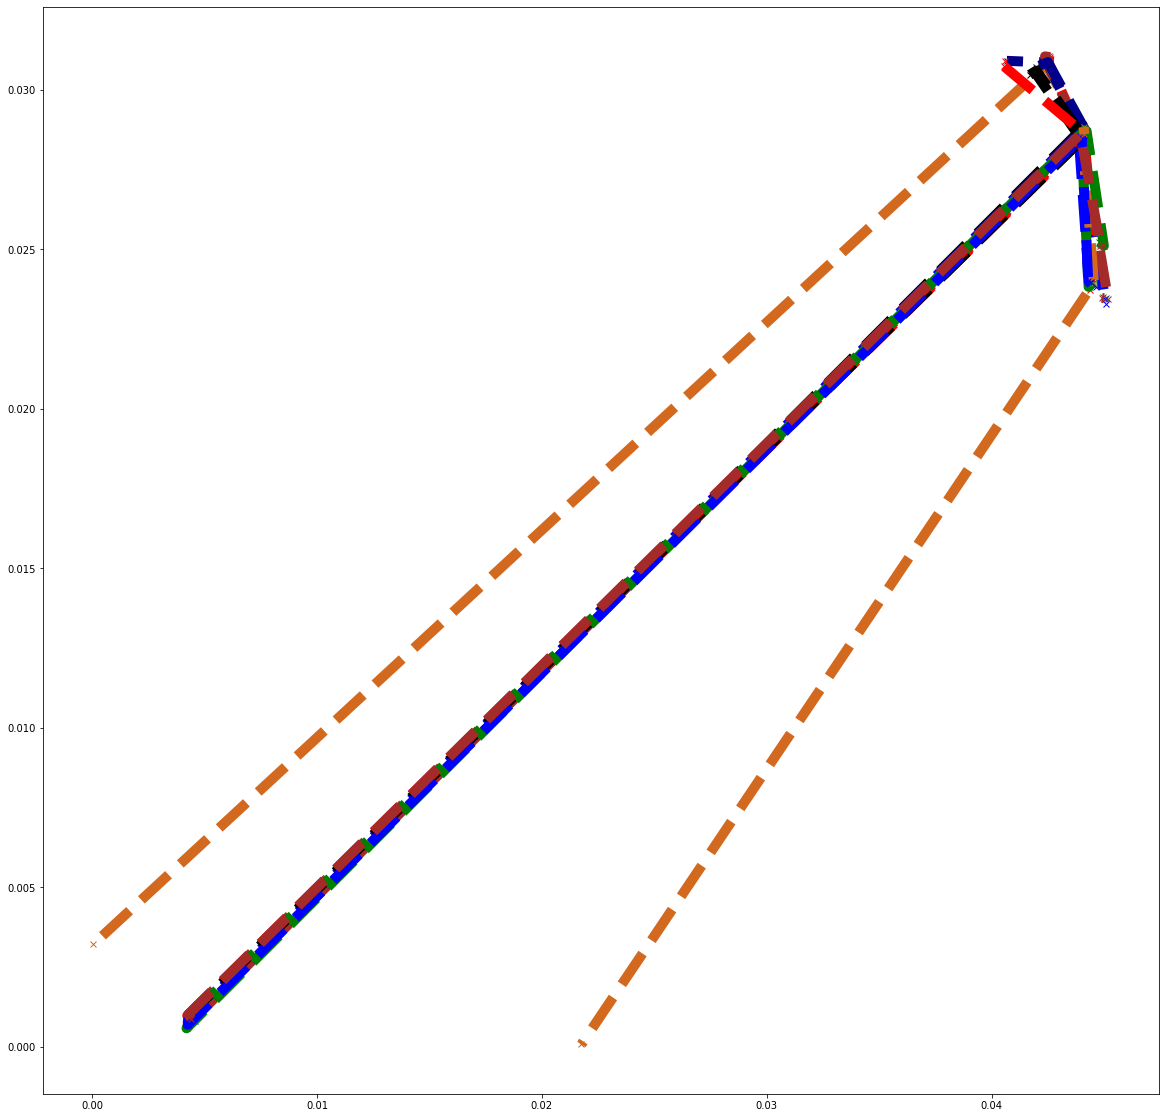

In [17]:
#ip_adress = choice(list(queries_dict.keys()))
ip_adress = '237.34.214.242'
queries = queries_dict[ip_adress]
map_of_one_individual(queries)

In [46]:
print("==================")
print("ip_adress = ", ip_adress)
queries = queries_dict[ip_adress]
for query in queries:
    print("It was a " + day(query[2]) + " at " + time_of_the_day(query[2]) + " and the user went to " + query[-1])

ip_adress =  11.173.13.2
It was a Monday at 14 and the user went to cafeteria
It was a Monday at 14 and the user went to restaurant
It was a Monday at 15 and the user went to supermarket
It was a Monday at 15 and the user went to restaurant
It was a Monday at 21 and the user went to restaurant
It was a Monday at 21 and the user went to gym
It was a Tuesday at 11 and the user went to cafeteria
It was a Tuesday at 11 and the user went to restaurant
It was a Tuesday at 18 and the user went to gym
It was a Tuesday at 18 and the user went to restaurant
It was a Wednesday at 12 and the user went to cafeteria
It was a Wednesday at 12 and the user went to restaurant
It was a Wednesday at 19 and the user went to dojo
It was a Wednesday at 19 and the user went to gym
It was a Wednesday at 22 and the user went to restaurant
It was a Wednesday at 22 and the user went to dojo
It was a Thursday at 12 and the user went to cafeteria
It was a Thursday at 12 and the user went to restaurant
It was a Thur

### User '237.34.214.242' probably works close to the cafeterias/restaurants and lives close to the supermarket, dojo, gym

In [19]:
# count the how many times a user does a particular query
def cout(queries):
    noise_lat_mu = (MAX_LAT - MIN_LAT)/10.0
    noise_lon_mu = (MAX_LON - MIN_LON)/10.0
    trajectory_of_the_week_lat = {}
    trajectory_of_the_week_lon = {}    
        # queries are sorted based on time
    for query in queries:
        lat, lon, time, type_poi = query[:]
        day = time // 24
        noise_lat = gauss(noise_lat_mu, noise_lat_mu)
        noise_lon = gauss(noise_lon_mu, noise_lon_mu)
        noise_lat, noise_lon = 0.001, 0.001
        if day not in trajectory_of_the_week_lat.keys():
            trajectory_of_the_week_lat[day] = []
            trajectory_of_the_week_lon[day] = []
        trajectory_of_the_week_lat[day].append((lat - MIN_LAT) + noise_lat)
        trajectory_of_the_week_lon[day].append((lon - MIN_LON) + noise_lon) 
    # for each day we have the trajectory
    color = [ 'black','red', 'green', 'blue','brown','chocolate', 'darkblue', 'purple', 'orange']
    n = len(trajectory_of_the_week_lat.keys())
    for i in range(n):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    num_days = len(trajectory_of_the_week_lat.keys())
    #num_days_sqrt = ceil(sqrt(float(num_days)))
    for day in trajectory_of_the_week_lat.keys():
        print(day, " this is a new day")
        x = trajectory_of_the_week_lat[day]
        y = trajectory_of_the_week_lon[day]
        # plot lines
        plt.plot(x, y, color = color[int(day) % 7], linestyle='dashed', marker='x', linewidth = 10)
    plt.show()

In [20]:
# for each user count the number of queries that we 
def where_do_you_leave(queries):
    # first we need to find the max lat and max lon of the individual
    MAX_LAT = float('-inf')
    MAX_LON = float('-inf')
    MIN_LAT = float('inf')
    MIN_LON = float('inf')
    for query in queries:
        MAX_LAT = max(query[0], MAX_LAT)
        MIN_LAT = min(query[0], MIN_LAT)
        MAX_LON = max(query[1], MAX_LON)
        MIN_LON = min(query[1], MIN_LON)
    noise_lat_mu = (MAX_LAT - MIN_LAT)/10.0
    noise_lon_mu = (MAX_LON - MIN_LON)/10.0
    trajectory_of_the_week_lat = {}
    trajectory_of_the_week_lon = {}    
        # queries are sorted based on time
    for query in queries:
        lat, lon, time, type_poi = query[:]
        day = time // 24
        noise_lat = gauss(noise_lat_mu, noise_lat_mu)
        noise_lon = gauss(noise_lon_mu, noise_lon_mu)
        noise_lat, noise_lon = 0.001, 0.001
        if day not in trajectory_of_the_week_lat.keys():
            trajectory_of_the_week_lat[day] = []
            trajectory_of_the_week_lon[day] = []
        trajectory_of_the_week_lat[day].append((lat - MIN_LAT) + noise_lat)
        trajectory_of_the_week_lon[day].append((lon - MIN_LON) + noise_lon) 
    # for each day we have the trajectory
    color = [ 'black','red', 'green', 'blue','brown','chocolate', 'darkblue', 'purple', 'orange']
    n = len(trajectory_of_the_week_lat.keys())
    for i in range(n):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    num_days = len(trajectory_of_the_week_lat.keys())
    #num_days_sqrt = ceil(sqrt(float(num_days)))
    for day in trajectory_of_the_week_lat.keys():
        print(day, " this is a new day")
        x = trajectory_of_the_week_lat[day]
        y = trajectory_of_the_week_lon[day]
        # plot lines
        plt.plot(x, y, color = color[int(day) % 7], linestyle='dashed', marker='x', linewidth = 10)
    plt.show()

In [21]:
def sporty_type(queries):
    days = set()
    sporty= 0
    for query in queries:
        lat, lon, time, type_poi = query[:]
        day = time // 24
        days.add(day)
        if type_poi in WORKOUT:
            sporty +=1
        SPORTY_THRESHOLD = 0.5
    if sporty/float(len(days)) > SPORTY_THRESHOLD:
        print("the user is very sporty")
        return True
    else:
        print("the user is not very sporty")
        return False

In [41]:
def weekends(queries):
    days = set()
    pois_during_weekends = []
    for query in queries:
        lat, lon, time, type_poi = query[:]
        if type_poi not in HAVING_FUN:
            continue
        day = int(time // 24) % 7
        if ((day == 6) or (day == 5)):
            pois_during_weekends.append(type_poi)
    pois_during_weekends = list((x,pois_during_weekends.count(x)) for x in set(pois_during_weekends))
    pois_during_weekends.sort(key = lambda x: x[1])
    if not pois_during_weekends:
        return "none"
    elif len(pois_during_weekends) == 1:
        return pois_during_weekends[0][0]
    elif len(pois_during_weekends) == 2:
        a, ac, b, bc = pois_during_weekends[0][0], pois_during_weekends[0][1], pois_during_weekends[1][0], pois_during_weekends[1][1]
        if ac > bc + 2:
            return a
        elif bc > ac + 2:
            return b
        elif bc*ac == 0:
            return "none"
        else:
            return "both"            
        
    return pois_during_weekends[-1]

In [42]:
def sporty_type(queries):
    days = set()
    sporty= 0
    for query in queries:
        lat, lon, time, type_poi = query[:]
        day = time // 24
        days.add(day)
        if type_poi in WORKOUT:
            sporty +=1
        SPORTY_THRESHOLD = 0.5
    if sporty/float(len(days)) > SPORTY_THRESHOLD:
        return True
    else:
        return False

## How many users are sporty

In [44]:
ip_adresses = queries_dict.keys()
sporty = 0
for ip_adress in ip_adresses:
    queries = queries_dict[ip_adress]
    if sporty_type(queries):
        sporty +=1
print(100.0 * sporty/len(ip_adresses), "% of the users are sporty" )

83.0 % of the users are sporty


### Statistics of where users prefer to go have a drink in the weekends

In [45]:
bar, club = 0, 0
both, none = 0, 0
for ip_adress in ip_adresses:
    queries = queries_dict[ip_adress]
    preference = weekends(queries)
    if preference == 'both':
        both += 1
    if preference == 'none':
        none += 1
    if preference == 'bar':
        bar += 1
    if preference == 'club':
        club += 1
print(100.0 * both/len(ip_adresses), "% of the users like both bars and clubs" )
print(100.0 * none/len(ip_adresses), "% of the users like neither bars nor clubs" )
print(100.0 * bar/len(ip_adresses), "% of the users like bars" )
print(100.0 * club/len(ip_adresses), "% of the users like clubs" )

26.0 % of the users like both bars and clubs
11.5 % of the users like neither bars nor clubs
30.5 % of the users like bars
32.0 % of the users like clubs
